In [1]:
from os.path import join
import pandas as pd

# csv 파일 위치
data_dir = '~/aiffel/kaggle_kakr_housing/data'
train_csv_path = join(data_dir, 'train.csv')
test_csv_path = join(data_dir, 'test.csv')

# csv 파일 불러오기
train = pd.read_csv(train_csv_path)
test = pd.read_csv(test_csv_path)

In [2]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


<AxesSubplot:>

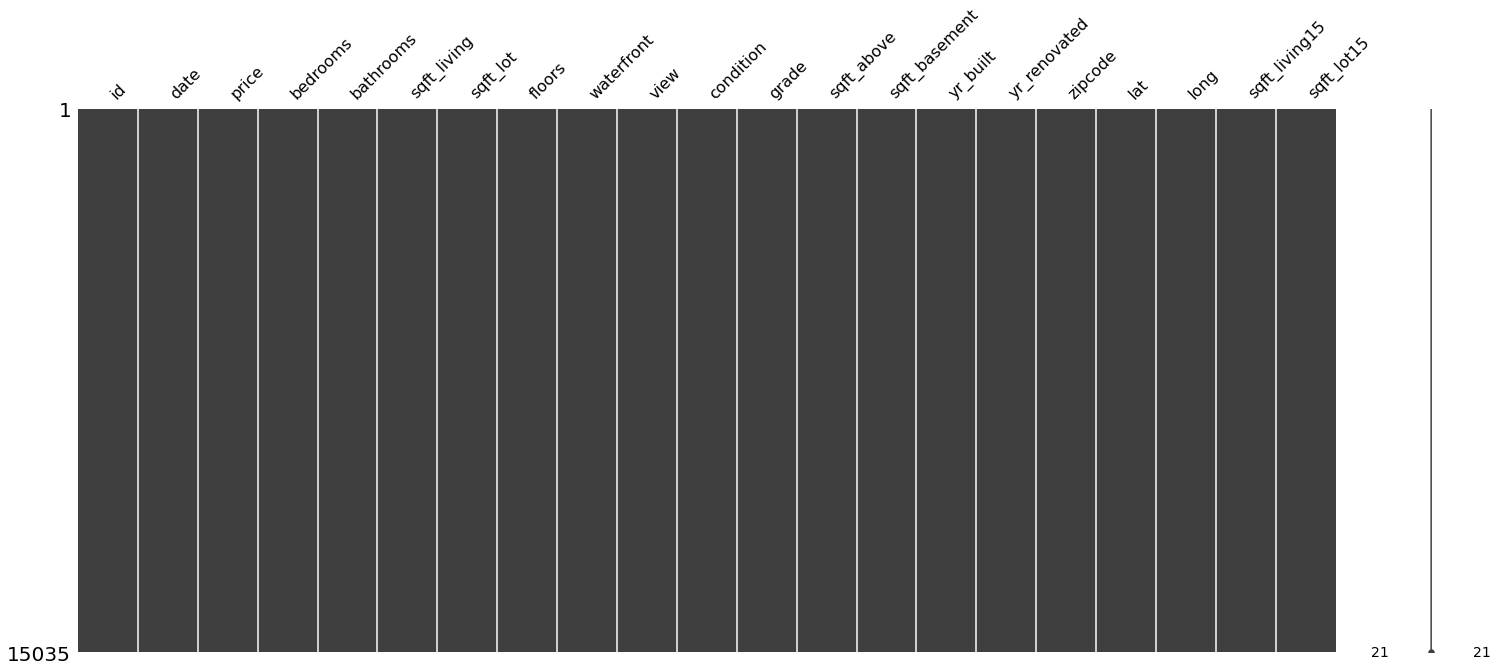

In [3]:
# 결측지 탐지
import missingno as msn

msn.matrix(train)

<AxesSubplot:>

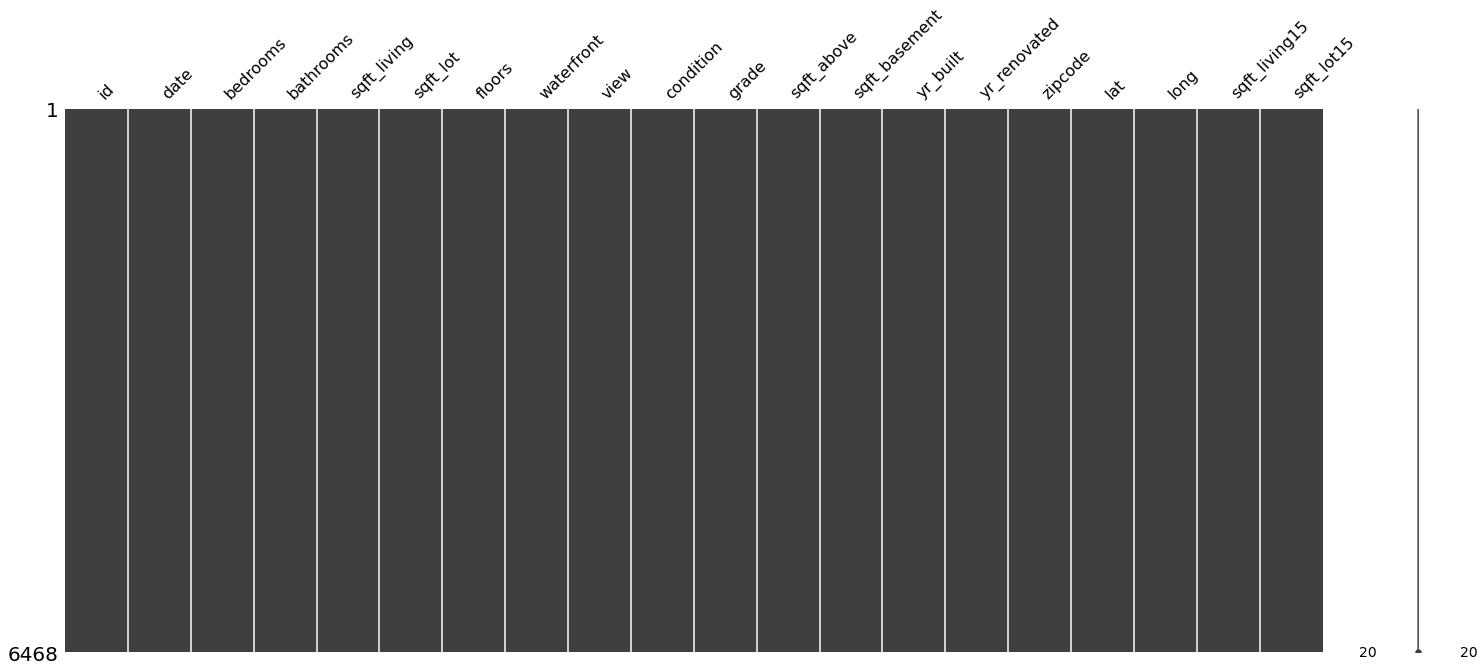

In [4]:
msn.matrix(test)

In [5]:
# date에서 의미없는 부분 제거
train['date'] = train['date'].apply(lambda x: x[:8]).astype(int)
test['date'] = test['date'].apply(lambda x: x[:8]).astype(int)

# 정답 데이터 분리
y = train['price']
del train['price']

# 학습에 필요없는 id 제거
del train['id']

# 모델 예측값 제출을 위해 테스트 데이터셋의 id는 분리
test_id = test['id']
del test['id']

In [6]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

In [7]:
# train 데이터셋 특성 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [8]:
# test 데이터셋 특성 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6468 non-null   int64  
 1   bedrooms       6468 non-null   int64  
 2   bathrooms      6468 non-null   float64
 3   sqft_living    6468 non-null   int64  
 4   sqft_lot       6468 non-null   int64  
 5   floors         6468 non-null   float64
 6   waterfront     6468 non-null   int64  
 7   view           6468 non-null   int64  
 8   condition      6468 non-null   int64  
 9   grade          6468 non-null   int64  
 10  sqft_above     6468 non-null   int64  
 11  sqft_basement  6468 non-null   int64  
 12  yr_built       6468 non-null   int64  
 13  yr_renovated   6468 non-null   int64  
 14  zipcode        6468 non-null   int64  
 15  lat            6468 non-null   float64
 16  long           6468 non-null   float64
 17  sqft_living15  6468 non-null   int64  
 18  sqft_lot

In [9]:
import numpy as np

# 상관계수 분석
corrs = []
cols = train.columns
for col in cols:
    corrs.append((col, np.corrcoef(train[col].values, y.values)[0][1]))

sorted(corrs, key=lambda x: x[1], reverse=True)

[('sqft_living', 0.7028989824942344),
 ('grade', 0.6672107746564205),
 ('sqft_above', 0.6085774049666444),
 ('sqft_living15', 0.5864192019652353),
 ('bathrooms', 0.5254794485179817),
 ('view', 0.4008059094783666),
 ('bedrooms', 0.32367176573810513),
 ('sqft_basement', 0.32221832963676955),
 ('lat', 0.3016038939886894),
 ('waterfront', 0.26573831930478997),
 ('floors', 0.26258786775720006),
 ('yr_renovated', 0.14080798220500138),
 ('sqft_lot', 0.09679269664183698),
 ('sqft_lot15', 0.08638432673610331),
 ('yr_built', 0.0472903255115606),
 ('condition', 0.03973979621020226),
 ('long', 0.023546513995481338),
 ('date', 0.007690455654496592),
 ('zipcode', -0.05149842561440095)]

In [10]:
# 일정 상관계수값을 넘는 특성 필터링
corr_threshold = 0.3
corrs = dict(corrs)
cols_filtered = list(filter(lambda x: corrs[x] > corr_threshold, cols))

cols_filtered

['bedrooms',
 'bathrooms',
 'sqft_living',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15']

In [11]:
# 일정 상관계수값을 넘는 특성만 남기기
#train = train[cols_filtered]
#test = test[cols_filtered]

# 동일한 데이터 전처리를 위해 train 데이터셋과 test 데이터셋을 통합
X = pd.concat([train, test], ignore_index=True)
print(X.shape)

(21503, 19)


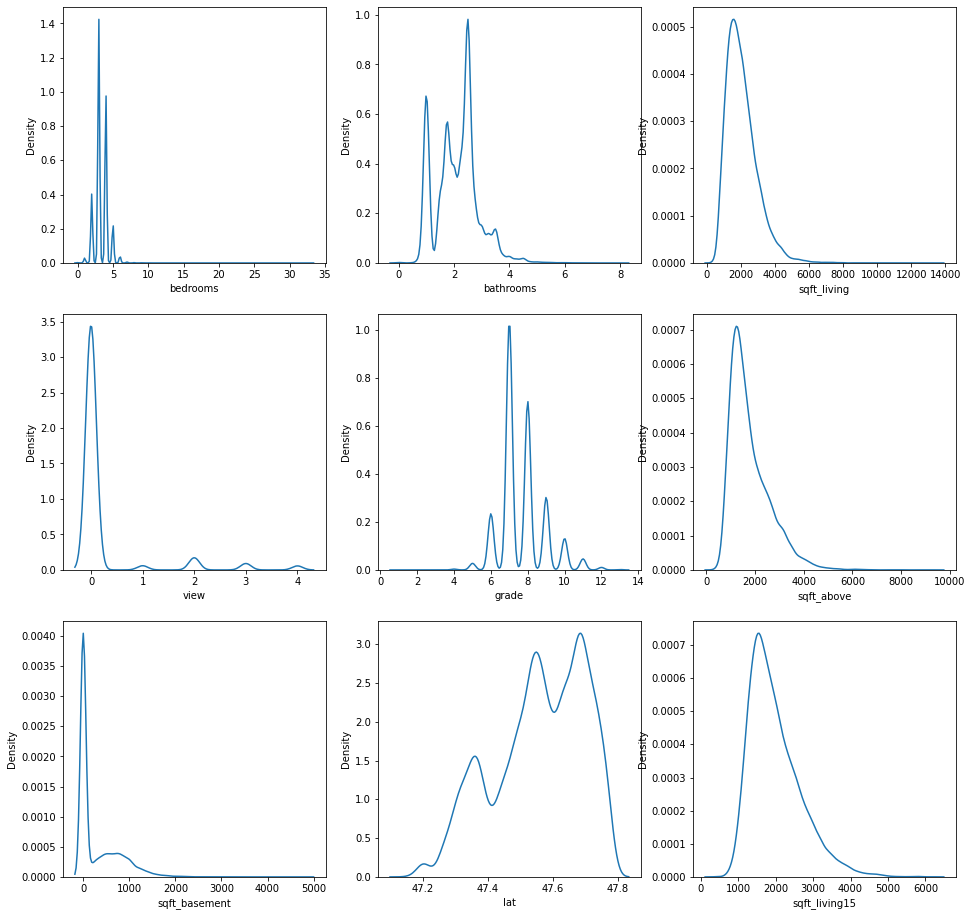

In [12]:
# 데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

n_rows = 3
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 16))

for i_row in range(n_rows):
    for i_col in range(n_cols):
        i = i_row * n_cols + i_col
        sns.kdeplot(X[cols_filtered[i]], ax=axs[i_row][i_col])
        axs[i_row][i_col].set_xlabel(cols_filtered[i])

plt.show()

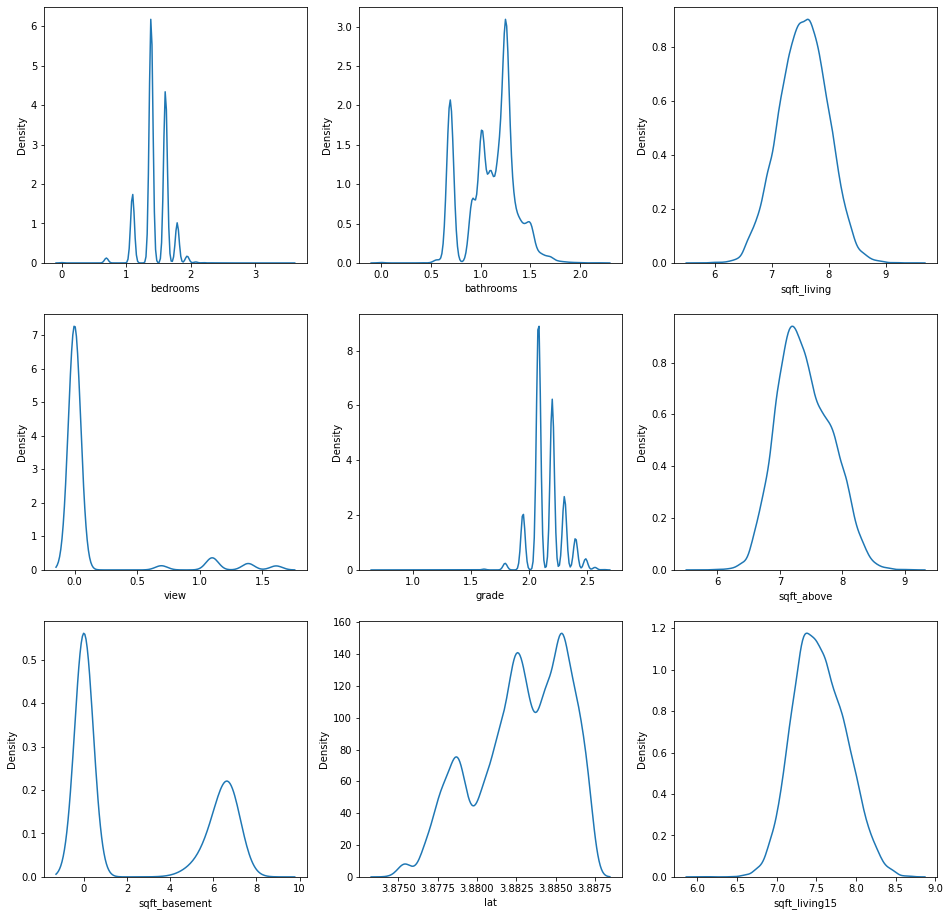

In [13]:
# log1p를 적용했을 때의 데이터 분포
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 16))

for i_row in range(n_rows):
    for i_col in range(n_cols):
        i = i_row * n_cols + i_col
        sns.kdeplot(np.log1p(X[cols_filtered[i]]), ax=axs[i_row][i_col])
        axs[i_row][i_col].set_xlabel(cols_filtered[i])

plt.show()

In [14]:
# 효과를 보인 bedrooms, bathrooms, sqft_living, sqft_above, sqft_living15만 log1p적용
for col in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15']:
    X[col] = X[col].apply(np.log1p)

# 로그 함수 적용 확인
X.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,1.386294,0.693147,7.074117,5650,1.0,0,0,3,7,7.074117,0,1955,0,98178,47.5112,-122.257,7.201171,5650
1,20150225,1.098612,0.693147,6.647688,10000,1.0,0,0,3,6,6.647688,0,1933,0,98028,47.7379,-122.233,7.908755,8062
2,20150218,1.386294,1.098612,7.427144,8080,1.0,0,0,3,8,7.427144,0,1987,0,98074,47.6168,-122.045,7.496097,7503
3,20140627,1.386294,1.178655,7.447751,6819,2.0,0,0,3,7,7.447751,0,1995,0,98003,47.3097,-122.327,7.713785,6819
4,20150115,1.386294,0.916291,6.966967,9711,1.0,0,0,3,7,6.966967,0,1963,0,98198,47.4095,-122.315,7.409136,9711


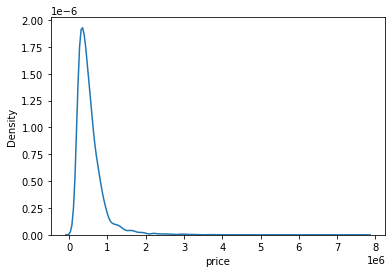

In [15]:
# 정답 데이터 분포 확인
sns.kdeplot(y)
plt.show()

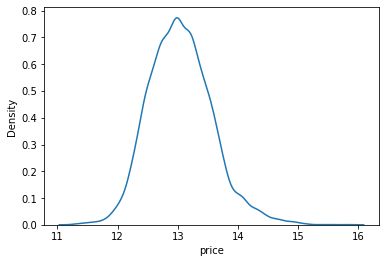

In [16]:
# 정답 데이터에 log1p 적용 후 분포 확인
sns.kdeplot(np.log1p(y))
plt.show()

In [17]:
# 정답 데이터에 log1p 적용
# 이후 prediction 도출시 expm1을 반드시 적용해야함
y = np.log1p(y)

# 정답 데이터를 ndarray로 변환
y = y.values

In [18]:
# 하나로 합쳤던 데이터셋을 다시 train/test 용으로 분리 후 ndarray로 변환
X_train = X.iloc[:len(train), :].values
X_test = X.iloc[len(train):, :].values

print(X_train.shape, X_test.shape)

(15035, 19) (6468, 19)


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# 기본 하이퍼 파라미터 모델 불러오기
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

random_state = 42

models = [
    {
        'name': 'GradientBoosting',
        'model': GradientBoostingRegressor(random_state=random_state)
    },
    {
        'name': 'XGBoost',
        'model': xgb.XGBRegressor(random_state=random_state)
    },
    {
        'name': 'LightGBM',
        'model': lgb.LGBMRegressor(random_state=random_state)
    }
]

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


In [21]:
# cross validation 진행
from sklearn.model_selection import KFold, cross_val_score

def get_cv_score(models, X, y):
    kfold = KFold(n_splits=5).get_n_splits(X)
    for m in models:
        # 각 모델마다 cross validation 진행
        CV_score = cross_val_score(m['model'], X=X, y=y, scoring='neg_mean_squared_error', cv=kfold)
        rmsle = np.mean(np.sqrt(-1 * CV_score)) # 각 모델의 RMSLE를 계산
        print(f"Model: {m['name']}, RMSLE:{rmsle:.4f}")

get_cv_score(models, X_train, y) # 기본 하이퍼 파라미터가 적용된 성능 평가

Model: GradientBoosting, RMSLE:0.1827
Model: XGBoost, RMSLE:0.1701
Model: LightGBM, RMSLE:0.1641


In [22]:
from sklearn.model_selection import GridSearchCV


# 하이퍼 파라미터 Grid Search 함수
def my_GridSearch(model, X_train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              cv=5, verbose=1, n_jobs=5)
    grid_model.fit(X_train, y)
    
    params = grid_model.cv_results_['params']
    scores = grid_model.cv_results_['mean_test_score']
    rmsle = np.sqrt(-1 * scores)
    
    results = pd.DataFrame(params)
    results['score'] = scores
    results['RMSLE'] = rmsle
    
    return results.sort_values('RMSLE')

In [23]:
# GradientBoostingRegressor의 하이퍼 파라미터 탐색
model = GradientBoostingRegressor(random_state=random_state)

# gradientboosting 하이퍼 파라미터 범위
gb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 7],
}

gb_search_results = my_GridSearch(model, X_train, y, gb_param_grid)
gb_search_results

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
11,0.10,7,100,-0.027783,0.166681
7,0.05,7,100,-0.028532,0.168914
10,0.10,7,50,-0.029025,0.170369
9,0.10,3,100,-0.033411,0.182786
6,0.05,7,50,-0.034230,0.185013
8,0.10,3,50,-0.039674,0.199182
5,0.05,3,100,-0.039768,0.199418
4,0.05,3,50,-0.053940,0.232251
3,0.01,7,100,-0.074274,0.272532
1,0.01,3,100,-0.102410,0.320015


In [24]:
# XGBRegressor의 하이퍼 파라미터 탐색
model = xgb.XGBRegressor(random_state=random_state)

# xgboost 하이퍼 파라미터 범위
xgb_param_grid = {
    'eta': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 10],
}

xgb_search_results = my_GridSearch(model, X_train, y, xgb_param_grid)
xgb_search_results

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warni

,eta,max_depth,n_estimators,score,RMSLE
11,0.10,10,100,-0.026893,0.163990
9,0.10,3,100,-0.033784,0.183804
10,0.10,10,50,-0.034012,0.184424
7,0.05,10,100,-0.035293,0.187866
8,0.10,3,50,-0.044934,0.211976
5,0.05,3,100,-0.046435,0.215488
6,0.05,10,50,-0.983759,0.991846
4,0.05,3,50,-0.991546,0.995764
3,0.01,10,100,-21.218828,4.606390
1,0.01,3,100,-21.218908,4.606399


In [25]:
# LGBMRegressor의 하이퍼 파라미터 탐색
model = lgb.LGBMRegressor(random_state=random_state)

# lightgbm 하이퍼 파라미터 범위
lgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 10],
}

lgb_search_results = my_GridSearch(model, X_train, y, lgb_param_grid)
lgb_search_results

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
11,0.10,10,100,-0.027024,0.164390
7,0.05,10,100,-0.029049,0.170438
10,0.10,10,50,-0.029253,0.171034
9,0.10,3,100,-0.033394,0.182741
6,0.05,10,50,-0.037285,0.193092
5,0.05,3,100,-0.039665,0.199160
8,0.10,3,50,-0.039868,0.199670
4,0.05,3,50,-0.053991,0.232360
3,0.01,10,100,-0.081078,0.284743
1,0.01,3,100,-0.102410,0.320015


In [26]:
# 최적화된 하이퍼 파라미터
gb_params = {
    'learning_rate': 0.5,
    'max_depth': 7,
    'n_estimators': 100
}

xgb_params = {
    'eta': 0.10,
    'max_depth': 10,
    'n_estimators': 100
}

lgb_params = {
    'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 100,
}

# 최적화된 하이퍼 파라미터를 가진 모델 로드하기
models = [
    {
        'name': 'GradientBoosting',
        'model': GradientBoostingRegressor(random_state=random_state, **gb_params)
    },
    {
        'name': 'XGBoost',
        'model': xgb.XGBRegressor(random_state=random_state, **xgb_params)
    },
    {
        'name': 'LightGBM',
        'model': lgb.LGBMRegressor(random_state=random_state, **lgb_params)
    }
]

In [27]:
# 학습 데이터로 검증
get_cv_score(models, X_train, y)

Model: GradientBoosting, RMSLE:0.1904
Model: XGBoost, RMSLE:0.1639
Model: LightGBM, RMSLE:0.1643


In [28]:
# 블랜딩 함수
def averagingBlending(models, X_train, y, X_test):
    for m in models:
        m['model'].fit(X_train, y)
    
    predictions = np.column_stack([
        m['model'].predict(X_test) for m in models
    ])

    return np.mean(predictions, axis=1)

In [29]:
y_pred = averagingBlending(models, X_train, y, X_test) # 에버리징 블랜딩
#y_pred = models[2]['model'].predict(X_test) # 단일모델 사용

y_pred = np.expm1(y_pred) # log1p 적용된 값을 다시 원상태로 복구

In [30]:
result = pd.DataFrame({ # 제출 파일 형식
    'id' : test_id, 
    'price' : y_pred
})

result_csv_path = join(data_dir, 'submission.csv') # 제출 파일 위치
result.to_csv(result_csv_path, index=False) # 제출 파일 저장

Private Score: 161212.19045